In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import numpy as np

WDIR = os.environ['DM21CM_DIR']
sys.path.append(WDIR)
from dm21cm.injections.dm import DMDecayInjection, DMPWaveAnnihilationInjection
from dm21cm.injections.pbh import PBHHRInjection, PBHAccretionInjection
from dm21cm.utils import abscs
from scripts.step_size import *
from limits import get_limits

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc_file(f"{WDIR}/matplotlibrc")

# Decay as rough reference

In [17]:
z_s = np.linspace(5, 3000-1, 300)

def eng_color(eng):
    cmap = mpl.colormaps['cool']
    return cmap((np.log10(eng) - 1) / 11)

eng_sm = mpl.cm.ScalarMappable(
    norm=mpl.colors.LogNorm(vmin=1e1, vmax=1e13),
    cmap='cool'
)
def eng_cmap(eng):
    return eng_sm.to_rgba(eng)

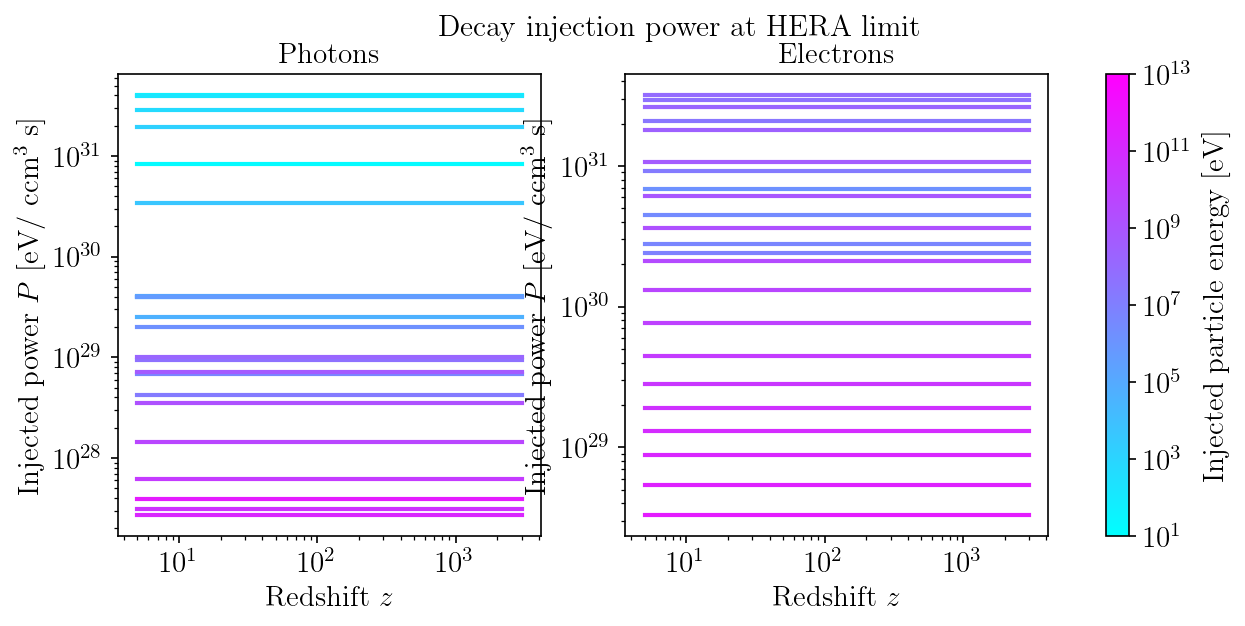

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

ax = axs[0]
for m in decay_phot_m_s:
    eng_inj = m / 2
    inj = DMDecayInjection(primary='phot_delta', m_DM=m, lifetime=get_limits(m, 'decay-phot'))
    inj.set_binning(abscs)
    inj_power_s = [inj.inj_power(z) / (1+z)**3 for z in z_s]
    ax.plot(z_s, inj_power_s, color=eng_cmap(eng_inj))
    ax.set(xscale='log', yscale='log')
    ax.set(xlabel=r'Redshift $z$', ylabel=r'Injected power $P$ [eV/ ccm$^3$ s]', title='Photons')

ax = axs[1]
for m in decay_elec_m_s:
    eng_inj = m / 2
    inj = DMDecayInjection(primary='elec_delta', m_DM=m, lifetime=get_limits(m, 'decay-elec'))
    inj.set_binning(abscs)
    inj_power_s = [inj.inj_power(z) / (1+z)**3 for z in z_s]
    ax.plot(z_s, inj_power_s, color=eng_cmap(eng_inj))
    ax.set(xscale='log', yscale='log')
    ax.set(xlabel=r'Redshift $z$', ylabel=r'Injected power $P$ [eV/ ccm$^3$ s]', title='Electrons')

fig.suptitle('Decay injection power at HERA limit')

cbar = fig.colorbar(eng_sm, ax=axs)
cbar.set_label('Injected particle energy [eV]')

# Injection strength

In [ ]:
from dm21cm.injections.dm import DMDecayInjection
from dm21cm.injections.pbh import PBHAccretionInjection

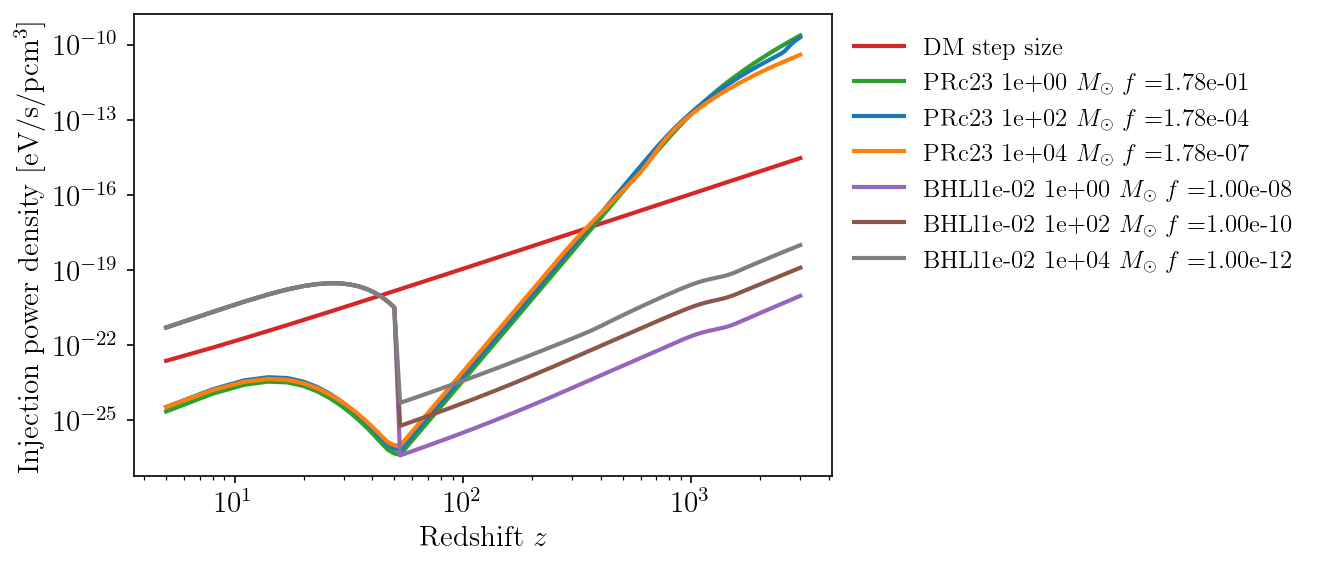

In [ ]:
z_s = np.linspace(5, 3000-1, 1000)

m_DM = 1e5 # [eV]
tau = decay_phot_lifetime(m_DM) # [s]
dm_inj = DMDecayInjection(primary='phot_delta', m_DM=m_DM, lifetime=tau)
dm_inj_power = np.array([dm_inj.inj_power(z) for z in z_s])

plt.plot(z_s, dm_inj_power, label='DM step size')

for model, ls in zip(['PRc23', 'BHLl1e-02'], ['-', '--']):
    for m_PBH in [1, 100, 10000]:
        f_PBH = pbh_acc_f(m_PBH, model)
        pbh_inj = PBHAccretionInjection(model=model, m_PBH=m_PBH, f_PBH=f_PBH)
        pbh_inj_power = np.array([pbh_inj.inj_power_std(z) for z in z_s])
        plt.plot(z_s, pbh_inj_power, label=fr'{model} {m_PBH:.0e} $M_\odot$ $f=${f_PBH:.2e}')

plt.xlabel(r'Redshift $z$')
plt.ylabel(r'Injection power density [eV/s/pcm$^3$]')
plt.loglog()
plt.legend(frameon=False, bbox_to_anchor=(1, 1))

/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


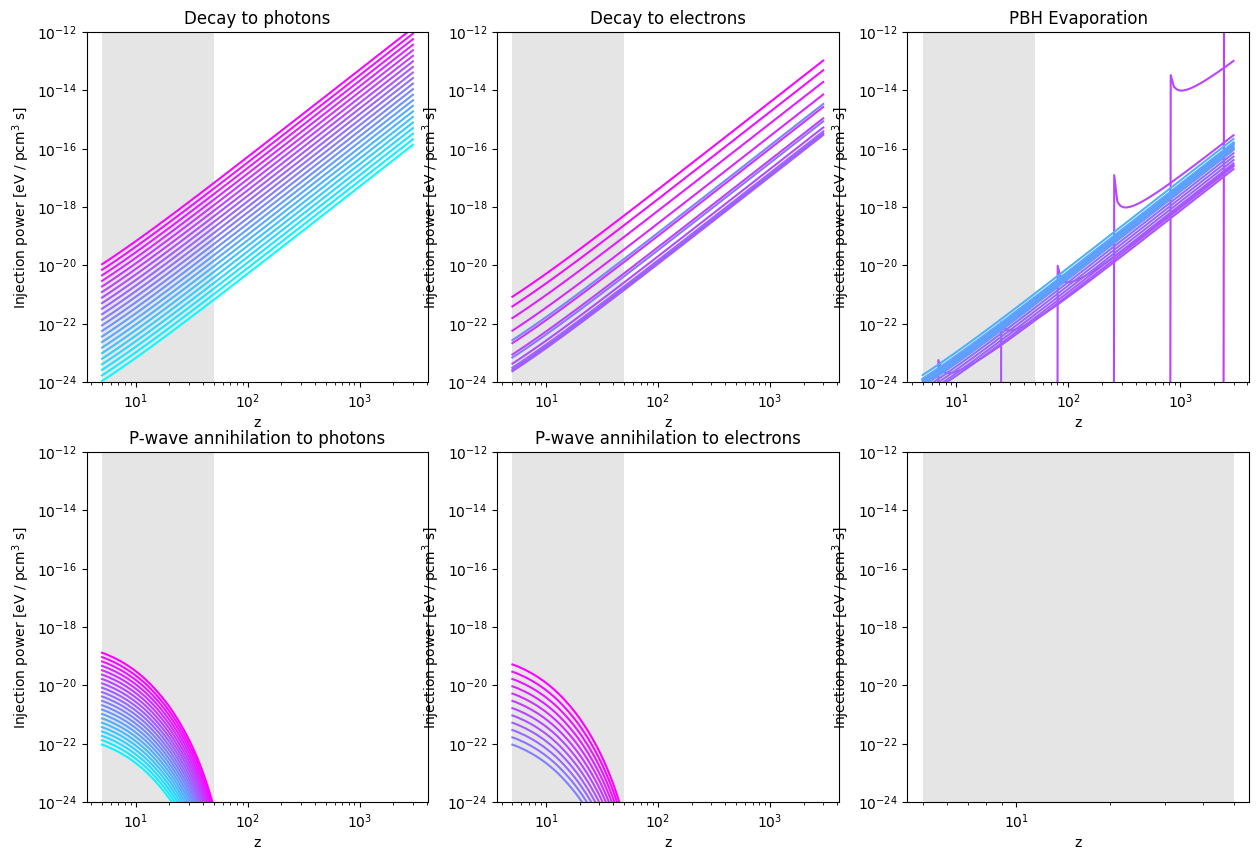

In [53]:
decay_phot_m_s = np.logspace(1.5, 12, 22)
decay_elec_m_s = np.logspace(6.5, 12, 12)
pwave_phot_m_s = np.logspace(1.5, 12, 22)
pwave_elec_m_s = np.logspace(6.5, 12, 12)
pbh_m_s = np.logspace(13.25, 18, 20)

z_s = np.geomspace(5, 3000, 100)

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

ax = axs[0, 0]
for m in decay_phot_m_s:
    eng_inj = m / 2
    color = cms['cool']((np.log10(eng_inj) - 1) / 11)
    inj = DMDecayInjection(primary='phot_delta', m_DM=m, lifetime=decay_phot_lifetime(m))
    inj.set_binning(abscs)
    inj_power_s = [inj.inj_power(z) for z in z_s]
    ax.plot(z_s, inj_power_s, color=color)
    ax.set(title='Decay to photons')

ax = axs[0, 1]
for m in decay_elec_m_s:
    eng_inj = m / 2
    color = cms['cool']((np.log10(eng_inj) - 1) / 11)
    inj = DMDecayInjection(primary='elec_delta', m_DM=m, lifetime=decay_elec_lifetime(m))
    inj.set_binning(abscs)
    inj_power_s = [inj.inj_power(z) for z in z_s]
    ax.plot(z_s, inj_power_s, color=color)
    ax.set(title='Decay to electrons')

ax = axs[0, 2]
for m in pbh_m_s:
    inj = PBHInjection(m_PBH=m, f_PBH=pbh_f(m))
    inj.set_binning(abscs)
    s = inj.inj_elec_spec(3000)
    eng_inj = np.sum(s.N * s.eng * s.eng) / np.sum(s.N * s.eng)
    color = cms['cool']((np.log10(eng_inj) - 1) / 11)
    inj_power_s = [inj.inj_power(z) for z in z_s]
    ax.plot(z_s, inj_power_s, color=color)
    ax.set(title='PBH Evaporation')

ax = axs[1, 0]
for m in pwave_phot_m_s:
    eng_inj = m
    color = cms['cool']((np.log10(eng_inj) - 1) / 11)
    inj = DMPWaveAnnihilationInjection(primary='phot_delta', m_DM=m, c_sigma=pwave_phot_c_sigma(m), cell_size=2)
    inj.set_binning(abscs)
    inj_power_s = [inj.inj_power(z) for z in z_s]
    ax.plot(z_s, inj_power_s, color=color)
    ax.set(title='P-wave annihilation to photons')

ax = axs[1, 1]
for m in pwave_elec_m_s:
    eng_inj = m
    color = cms['cool']((np.log10(eng_inj) - 1) / 11)
    inj = DMPWaveAnnihilationInjection(primary='elec_delta', m_DM=m, c_sigma=pwave_elec_c_sigma(m), cell_size=2)
    inj.set_binning(abscs)
    inj_power_s = [inj.inj_power(z) for z in z_s]
    ax.plot(z_s, inj_power_s, color=color)
    ax.set(title='P-wave annihilation to electrons')


[ax.loglog() for ax in axs.flatten()]
[ax.axvspan(5, 50, fc='gray', ec='none', alpha=0.2) for ax in axs.flatten()]
[ax.set(xlabel='z', ylabel='Injection power [eV / pcm$^3$ s]') for ax in axs.flatten()]
[ax.set(ylim=(1e-24, 1e-12)) for ax in axs.flatten()];